In [15]:
"""Gradient descent."""

'Gradient descent.'

In [16]:
# fmt: off
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

# импортируем фукцию diff() и
from sympy import diff

# превратим x и y в символы
from sympy.abc import x, y

# fmt: on

### Функция нескольких переменных

$$ f(w_1, w_2) = w_1^2 + w_2^2 $$

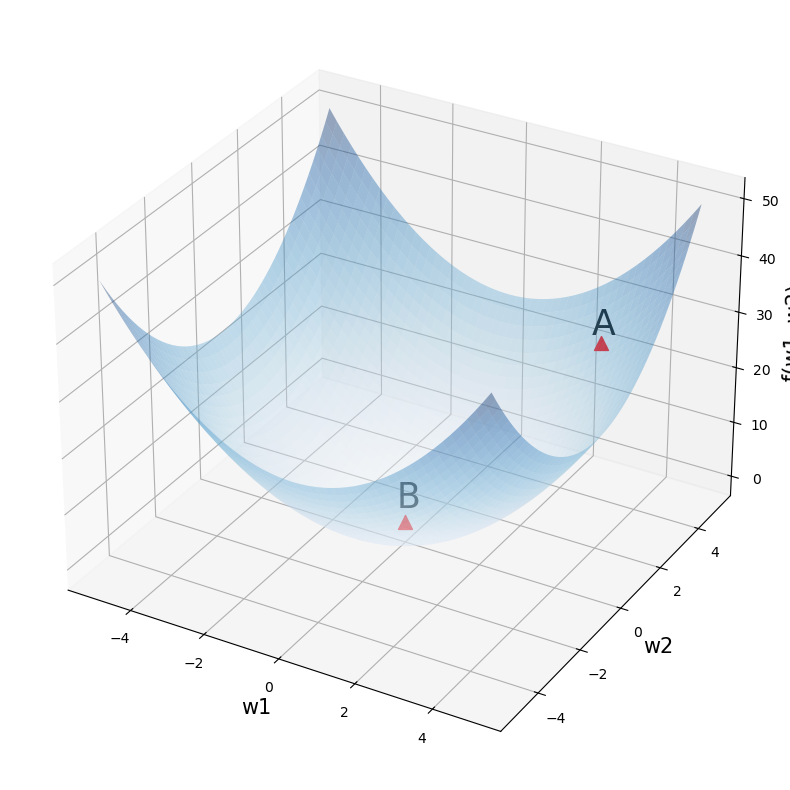

In [17]:
def plot_3d_surface() -> None:
    """Plot 3D surface of quadratic function with marked points A and B."""
    # установим размер графика
    figure = plt.figure(figsize=(12, 10))

    # создадим последовательность из 1000 точек в интервале от -5 до 5
    # для осей w1 и w2
    weight1 = np.linspace(-5, 5, 1000)
    weight2 = np.linspace(-5, 5, 1000)

    # создадим координатную плоскость из осей w1 и w2
    weight1, weight2 = np.meshgrid(weight1, weight2)

    # пропишем функцию
    func_val = weight1**2 + weight2**2

    # создадим трехмерное пространство
    axes = figure.add_subplot(projection="3d")

    # выведем график функции, alpha задает прозрачность
    axes.plot_surface(weight1, weight2, func_val, alpha=0.4, cmap="Blues")

    # выведем точку A с координатами (3, 4, 25) и подпись к ней
    axes.scatter(3, 4, 25, c="red", marker="^", s=100)
    axes.text(3, 3.5, 28, "A", size=25)

    # аналогично выведем точку B с координатами (0, 0, 0)
    axes.scatter(0, 0, 0, c="red", marker="^", s=100)
    axes.text(0, -0.4, 4, "B", size=25)

    # укажем подписи к осям
    axes.set_xlabel("w1", fontsize=15)
    axes.set_ylabel("w2", fontsize=15)
    axes.set_zlabel("f(w1, w2)", fontsize=15)

    # выведем результат
    plt.show()


plot_3d_surface()

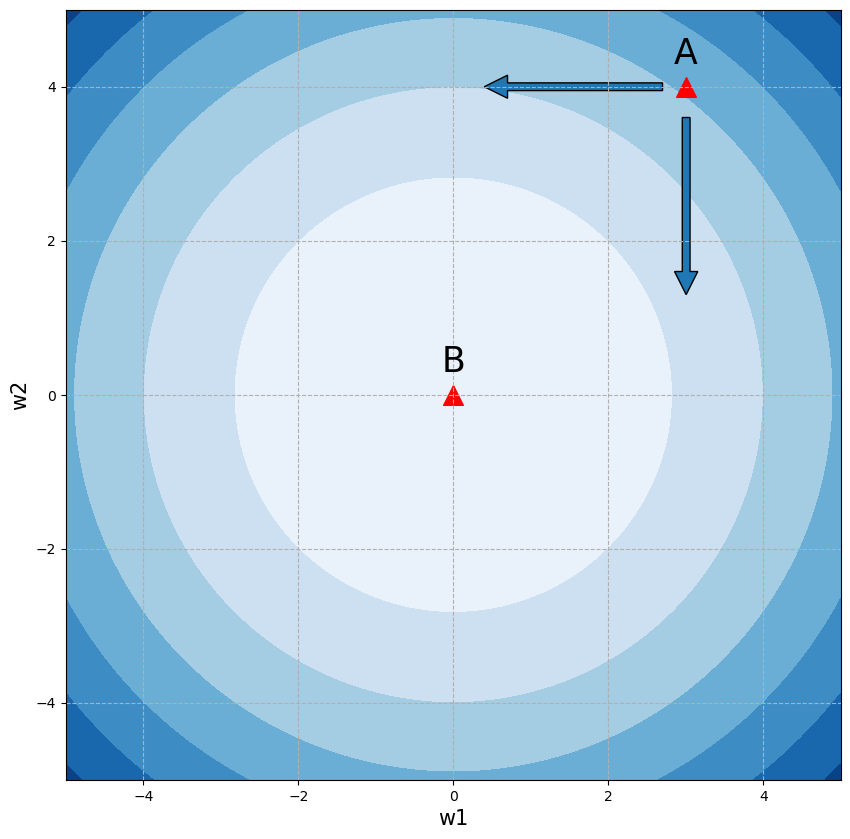

In [18]:
def plot_contour_with_points() -> None:
    """Plot contour of quadratic function with points and gradient arrows."""
    # установим размер графика
    _, axes = plt.subplots(figsize=(10, 10))

    # создадим последовательность из 100 точек в интервале от -5 до 5
    # для осей w1 и w2
    weight1 = np.linspace(-5.0, 5.0, 100)
    weight2 = np.linspace(-5.0, 5.0, 100)

    # создадим координатную плоскость из осей w1 и w2
    weight1, weight2 = np.meshgrid(weight1, weight2)

    # пропишем функцию
    contour_values = weight1**2 + weight2**2

    # построим изолинии (линии уровня)
    plt.contourf(weight1, weight2, contour_values, cmap="Blues")

    # выведем точку А с координатами на плоскости (3, 4)
    axes.scatter(3, 4, c="red", marker="^", s=200)
    axes.text(2.85, 4.3, "A", size=25)

    # и точку B с координатами (0, 0)
    axes.scatter(0, 0, c="red", marker="^", s=200)
    axes.text(-0.15, 0.3, "B", size=25)

    # укажем подписи к осям
    axes.set_xlabel("w1", fontsize=15)
    axes.set_ylabel("w2", fontsize=15)

    # а также стрелки направления изменений вдоль w1 и w2
    axes.arrow(2.7, 4, -2, 0, width=0.1, head_length=0.3)
    axes.arrow(3.005, 3.6, 0, -2, width=0.1, head_length=0.3)

    # создадим сетку в виде прерывистой черты
    plt.grid(linestyle="--")

    # выведем результат
    plt.show()


plot_contour_with_points()

Линии уровня(мат. анализ) показывают ландшафт функции.

### Частная производная
Сечение многомерной функции

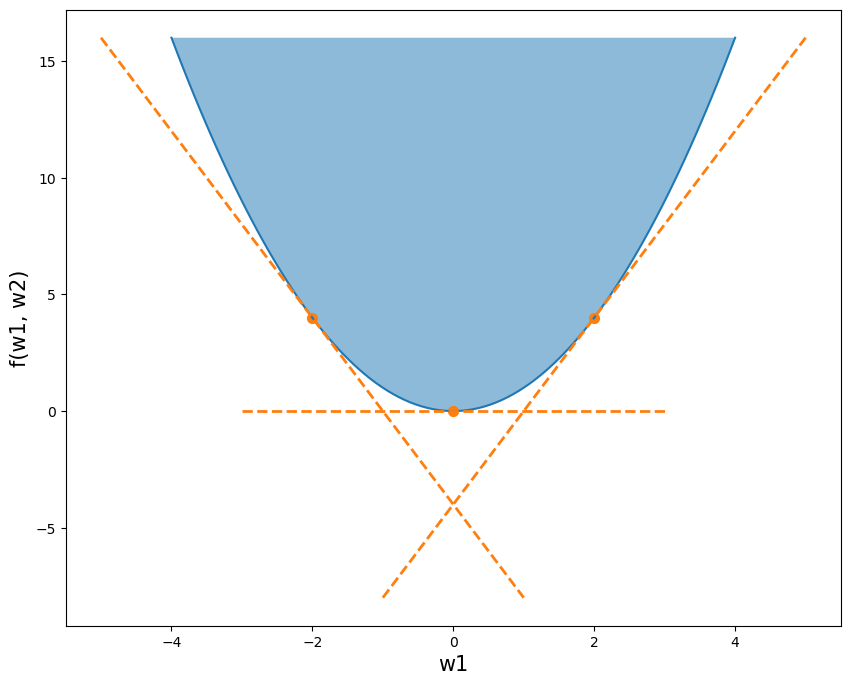

In [19]:
def plot_parabola_with_tangent_lines() -> None:
    """Plot a parabola with tangent lines at x=-2,0,2."""
    # set figure size in inches
    plt.figure(figsize=(10, 8))

    def parabola(weight: NDArray[np.float64]) -> NDArray[np.float64]:
        return weight**2

    def derivative(weight: NDArray[np.float64]) -> NDArray[np.float64]:
        return 2 * weight

    def tangent_line(
        weight: NDArray[np.float64], point_x: np.float64, point_y: np.float64
    ) -> NDArray[np.float64]:
        """Calculate tangent line using point-slope form."""
        derivative_val = derivative(np.array([point_x])[0])
        return derivative_val * (weight - point_x) + point_y

    # create x coordinates sequence for parabola
    weights = np.array(np.linspace(-4, 4, 100), dtype=np.float64)

    # plot parabola
    plt.plot(weights, parabola(weights))

    # fill area under curve with blue color at 0.5 alpha
    plt.fill_between(weights, parabola(weights), 16, alpha=0.5)

    # iterate through points -2, 0, 2 on x axis
    for point_x_int in range(-2, 3, 2):
        point_x = np.float64(point_x_int)
        # calculate corresponding y coordinates
        point_y = parabola(np.array([point_x], dtype=np.float64))[0]

        # define x range for tangent lines
        weight_range: NDArray[np.float64] = np.array(
            np.linspace(point_x - 3, point_x + 3, 9), dtype=np.float64
        )

        # plot tangent lines
        plt.plot(
            weight_range,
            tangent_line(weight_range, point_x, point_y),
            "C1--",
            linewidth=2,
        )

        # plot points of tangency
        plt.scatter(point_x, point_y, color="C1", s=50)

    # set axis labels
    plt.xlabel("w1", fontsize=15)
    plt.ylabel("f(w1, w2)", fontsize=15)

    # show plot
    plt.show()


plot_parabola_with_tangent_lines()

Взятие частных производных с помощью SymPy

In [20]:
# напишем функцию, которую хотим дифференцировать
f_def = x**2 + y**2

# найдем частную производную по первой переменной
diff(f_def, x)

2*x

### Метод градиентного спуска

Градиент показывает направление скорейшего роста функции. Задача - уменьшить. Градиент это вектор частных производных. Для оптимизации нам нужен анти-градиент.

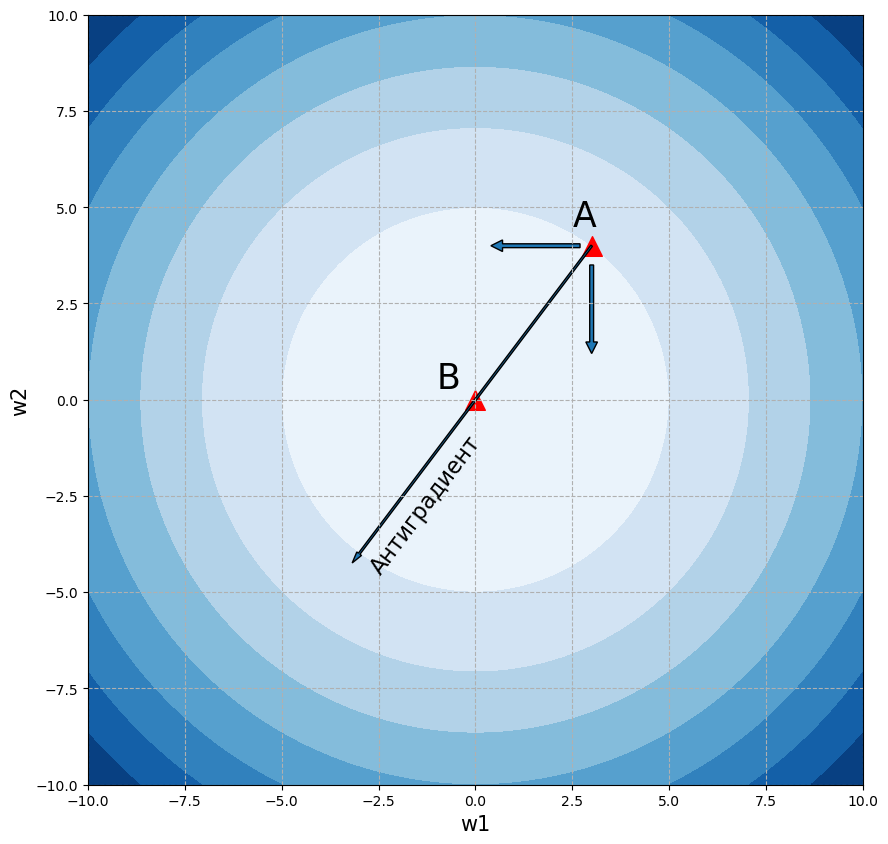

In [21]:
def plot_gradient_descent_example(figsize: tuple[int, int] = (10, 10)) -> None:
    """Plot contour plot showing gradient descent direction with points."""
    # установим размер графика
    _, axes = plt.subplots(figsize=figsize)

    # создадим последовательность из 100 точек в интервале от -10 до 10
    # для осей w1 и w2
    weight1 = np.linspace(-10.0, 10.0, 100)
    weight2 = np.linspace(-10.0, 10.0, 100)

    # создадим координатную плоскость из осей w1 и w2
    weight1, weight2 = np.meshgrid(weight1, weight2)

    # пропишем функцию
    contour_values = weight1**2 + weight2**2

    # построим изолинии (линии уровня)
    plt.contourf(weight1, weight2, contour_values, cmap="Blues")

    # выведем точку А с координатами на плоскости (3, 4)
    axes.scatter(3, 4, c="red", marker="^", s=200)
    axes.text(2.5, 4.5, "A", size=25)

    # и точку B с координатами (0, 0)
    axes.scatter(0, 0, c="red", marker="^", s=200)
    axes.text(-1, 0.3, "B", size=25)

    # укажем подписи к осям
    axes.set_xlabel("w1", fontsize=15)
    axes.set_ylabel("w2", fontsize=15)

    # а также стрелки направления изменений вдоль w1 и w2
    axes.arrow(2.7, 4, -2, 0, width=0.1, head_length=0.3)
    axes.arrow(3, 3.5, 0, -2, width=0.1, head_length=0.3)

    # выведем вектор антиградиента с направлением (-6, -8)
    axes.arrow(3, 4, -6, -8, width=0.05, head_length=0.3)
    axes.text(-2.8, -4.5, "Антиградиент", rotation=53, size=16)

    # создадим сетку в виде прерывистой черты
    plt.grid(linestyle="--")

    # выведем результат
    plt.show()


plot_gradient_descent_example()

In [22]:
# пропишем функцию потерь


def objective(w1_val: float, w2_val: float) -> float:
    """Calculate loss function as sum of squares."""
    return w1_val**2 + w2_val**2


# а также производную по первой


def partial_1(w1_val: float) -> float:
    """Calculate partial derivative with respect to w1."""
    return 2.0 * w1_val


# и второй переменной


def partial_2(w2_val: float) -> float:
    """Calculate partial derivative with respect to w2."""
    return 2.0 * w2_val

In [ ]:
# пропишем изначальные веса
w1, w2 = float(3), float(4)

# количество итераций
iterations_count = 100

# и скорость обучения
learning_rate = 0.05

In [ ]:
w1_list = []
w2_list = []
l_list = []

for _ in range(iterations_count):
    w1_list.append(w1)
    w2_list.append(w2)
    l_list.append(objective(w1, w2))
    par_1 = partial_1(w1)
    par_2 = partial_2(w2)
    w1 = w1 - learning_rate * par_1
    w2 = w2 - learning_rate * par_2


print(w1, w2, objective(w1, w2))

(7.968419666276241e-05, 0.00010624559555034984, 1.7637697771638315e-08)

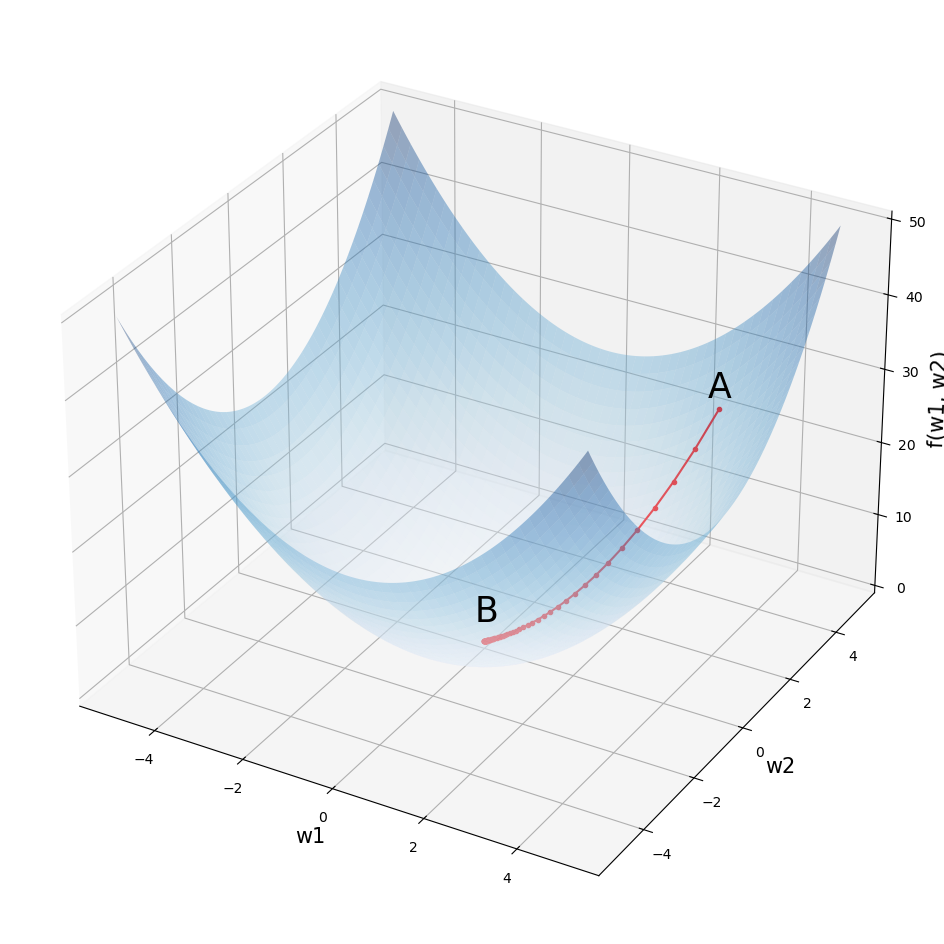

In [45]:
def draw_grad_process() -> None:
    """Draw 3D visualization of gradient descent process."""
    fig = plt.figure(figsize=(14, 12))

    x_vl = np.linspace(-5, 5, 1000)
    y_vl = np.linspace(-5, 5, 1000)

    x_vl, y_vl = np.meshgrid(x_vl, y_vl)

    func = x_vl**2 + y_vl**2

    ax = fig.add_subplot(projection="3d")

    ax.plot_surface(x_vl, y_vl, func, alpha=0.4, cmap="Blues")

    ax.text(3, 3.5, 28, "A", size=25)
    ax.text(0, -0.4, 4, "B", size=25)

    ax.set_xlabel("w1", fontsize=15)
    ax.set_ylabel("w2", fontsize=15)
    ax.set_zlabel("f(w1, w2)", fontsize=15)

    # выведем путь алгоритма оптимизации
    ax.plot(w1_list, w2_list, l_list, ".-", c="red")

    plt.show()

    # берем все точки из датасета, полный град


draw_grad_process()

In [51]:
# Простая линейная регрессия
# возьмем уже известные нам данные роста и обхвата шеи
X_val = np.array(
    [
        1.48,
        1.49,
        1.49,
        1.50,
        1.51,
        1.52,
        1.52,
        1.53,
        1.53,
        1.54,
        1.55,
        1.56,
        1.57,
        1.57,
        1.58,
        1.58,
        1.59,
        1.60,
        1.61,
        1.62,
        1.63,
        1.64,
        1.65,
        1.65,
        1.66,
        1.67,
        1.67,
        1.68,
        1.68,
        1.69,
        1.70,
        1.70,
        1.71,
        1.71,
        1.71,
        1.74,
        1.75,
        1.76,
        1.77,
        1.77,
        1.78,
    ]
)
y_val_2 = np.array(
    [
        29.1,
        30.0,
        30.1,
        30.2,
        30.4,
        30.6,
        30.8,
        30.9,
        31.0,
        30.6,
        30.7,
        30.9,
        31.0,
        31.2,
        31.3,
        32.0,
        31.4,
        31.9,
        32.4,
        32.8,
        32.8,
        33.3,
        33.6,
        33.0,
        33.9,
        33.8,
        35.0,
        34.5,
        34.7,
        34.6,
        34.2,
        34.8,
        35.5,
        36.0,
        36.2,
        36.3,
        36.6,
        36.8,
        36.8,
        37.0,
        38.5,
    ]
)

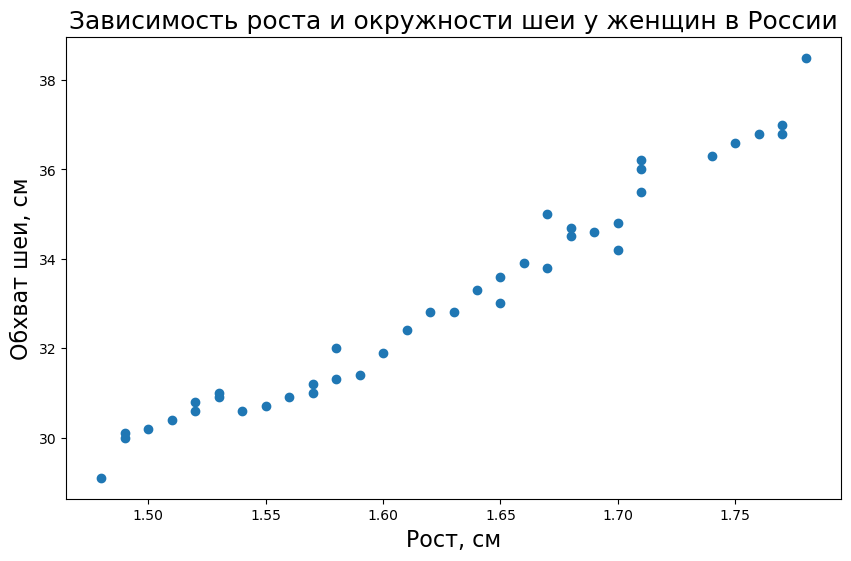

In [ ]:
# Поле корреляции, корреляционный анализ

# построим точечную диаграмму
plt.figure(figsize=(10, 6))
# Поле корреляции
plt.scatter(X_val, y_val_2)

# добавим подписи
plt.xlabel("Рост, см", fontsize=16)
plt.ylabel("Обхват шеи, см", fontsize=16)
plt.title("Зависимость роста и окружности шеи у женщин в России", fontsize=18)

plt.show()
# на основании поле корреляция принято
# решение использовать линейную регрессию, начало регрессионного анализа

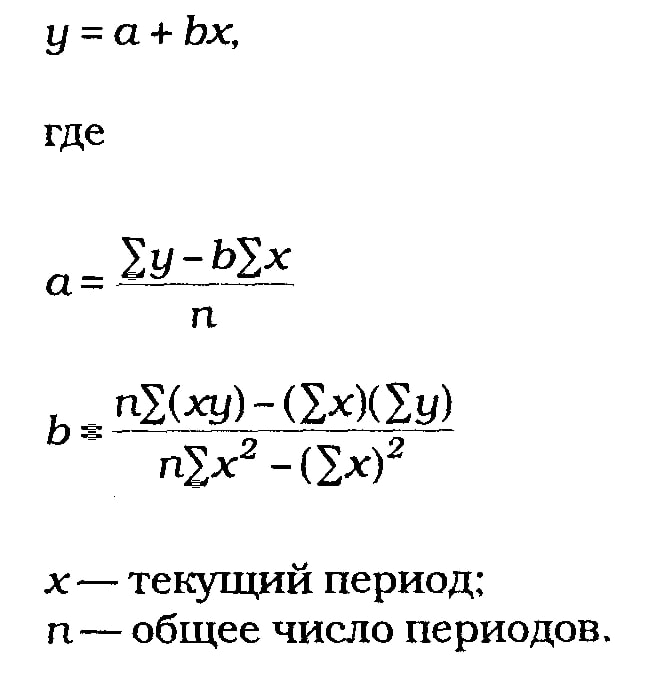

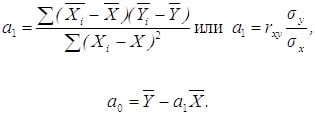

In [ ]:
# Метод наименьших квадратов
X_mean = np.mean(X_val)
Y_mean = np.mean(y_val_2)


numerator, denominator = 0, 0

for ind, val_ in enumerate(X_val):
    numerator += (val_ - X_mean) * (y[ind] - Y_mean)
    denominator += (val_ - X_mean) ** 2

w_val = numerator / denominator
b_val = Y_mean - w_val * X_mean
print(w_val, b_val)

26.861812005569753 -10.570936299787313
